In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from sklearn.preprocessing import OrdinalEncoder
import folium

In [6]:
conn = sqlite3.connect('dallas-ois.sqlite')

In [7]:
cursor = conn.cursor()

In [8]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name")

In [9]:
cursor.fetchall()

[('incidents',), ('officers',), ('subjects',)]

In [10]:
cursor.execute("PRAGMA table_info(incidents)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'date', 'DATE', 0, None, 0),
 (2, 'location', 'TEXT', 0, None, 0),
 (3, 'subject_statuses', 'TEXT', 0, None, 0),
 (4, 'subject_weapon', 'TEXT', 0, None, 0),
 (5, 'subjects', 'TEXT', 0, None, 0),
 (6, 'subject_count', 'INTEGER', 0, None, 0),
 (7, 'officers', 'TEXT', 0, None, 0),
 (8, 'officer_count', 'INTEGER', 0, None, 0),
 (9, 'grand_jury_disposition', 'TEXT', 0, None, 0),
 (10, 'attorney_general_forms_url', 'TEXT', 0, None, 0),
 (11, 'summary_url', 'TEXT', 0, None, 0),
 (12, 'summary_text', 'TEXT', 0, None, 0),
 (13, 'latitude', 'FLOAT', 0, None, 0),
 (14, 'longitude', 'FLOAT', 0, None, 0)]

In [11]:
cursor.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [12]:
cursor.execute("PRAGMA table_info(subjects)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [13]:
incidents = pd.read_sql('SELECT * FROM incidents', conn)
incidents.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [14]:
officers = pd.read_sql('SELECT * FROM officers', conn)
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [15]:
subjects = pd.read_sql('SELECT * FROM subjects', conn)
subjects.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,B,M,Smith,James,"Smith, James"
4,384832T,B,M,Dews,Antonio,"Dews, Antonio"


In [16]:
len(incidents), len(officers), len(subjects)

(219, 370, 223)

In [17]:
incidents.shape, officers.shape, subjects.shape

((219, 15), (370, 6), (223, 6))

In [18]:
subject_incidents = pd.read_sql('SELECT * FROM subjects JOIN incidents ON subjects.case_number=incidents.case_number',conn)

In [19]:
len(subject_incidents)

223

In [20]:
subject_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [21]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [22]:
# recode '2 Injured' to 'Injured'
subject_incidents.subject_statuses = np.where(subject_incidents.subject_statuses == '2 Injured', 'Injured', subject_incidents.subject_statuses)

In [23]:
# recode 'Deceased Injured' to 'Deceased'
subject_incidents.subject_statuses = np.where(subject_incidents.subject_statuses == 'Deceased Injured', 'Deceased', subject_incidents.subject_statuses)

In [24]:
subject_incidents.subject_statuses.value_counts()

Shoot and Miss          87
Deceased                71
Injured                 61
Other                    2
1 Deceased 1 Injured     2
Name: subject_statuses, dtype: int64

In [25]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Deceased,71,71,71,71,69,71,71,71,71,71,71,71,71,71,69,1,69,69,70,70
Injured,61,61,61,61,61,61,61,61,61,61,61,61,61,61,59,1,61,61,58,58
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [26]:
# Encoding target variable subject_statuses as oridnal by severity (0: Shoot and Miss, 1: Injured, 2: Deceased, 3: 2 Injured, 4: 1 Deceased 1 Injured, 5: Deceased Injured, 6: Other)
                
codes_outcome = ['Shoot and Miss', 'Injured', 'Deceased', '2 Injured', '1 Deceased 1 Injured', 'Deceased Injured', 'Other']
encoder = OrdinalEncoder(categories=[codes_outcome]).fit(subject_incidents[['subject_statuses']])
subject_incidents['target'] = encoder.transform(subject_incidents[['subject_statuses']])

In [27]:
# check recoding
pd.crosstab(subject_incidents.subject_statuses, subject_incidents.target)

target,0.0,1.0,2.0,4.0,6.0
subject_statuses,,,,,
1 Deceased 1 Injured,0,0,0,2,0
Deceased,0,0,71,0,0
Injured,0,61,0,0,0
Other,0,0,0,0,2
Shoot and Miss,87,0,0,0,0


In [29]:
subject_incidents['months'] = pd.to_datetime(subject_incidents['date']).dt.month

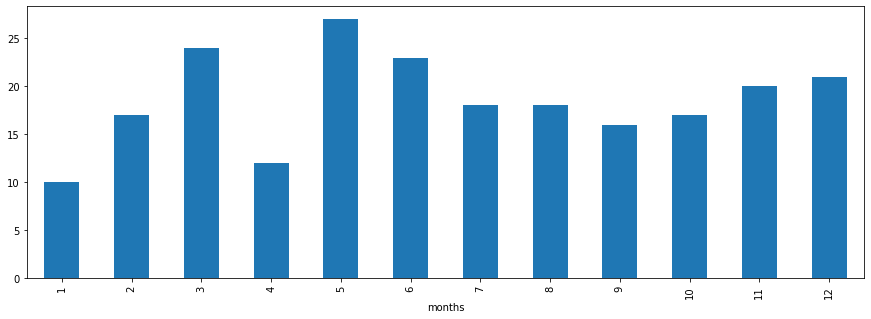

In [34]:
plt.figure(figsize=(15,5))
subject_incidents.months.groupby([subject_incidents['months']]).count().plot(kind = 'bar')
plt.show()

In [35]:
# reducing month further to season
# subject_incidents['season'] = ''
# subject_incidents['season'] = np.where(subject_incidents['months'].between(3,5), 'spring', subject_incidents['season'])
# subject_incidents['season'] = np.where(subject_incidents['months'].between(6,8), 'summer', subject_incidents['season'])
# subject_incidents['season'] = np.where(subject_incidents['months'].between(9,11), 'autumn', subject_incidents['season'])
# subject_incidents['season'] = np.where(subject_incidents['months'].between(1,2), 'winter', subject_incidents['season'])
# subject_incidents['season'] = np.where(subject_incidents['months'] == 12, 'winter', subject_incidents['season'])

# writing a function to code season from month
def season(i):
    if i > 2 and i < 6:
        return 'spring'
    elif i > 5 and i < 9:
        return 'summer'
    elif i > 8 and i < 12:
        return 'autumn'
    else:
        return 'winter'

In [36]:
# apply function on column month to create new column season
subject_incidents['season'] = subject_incidents['months'].apply(season)

In [37]:
# checking recoding
pd.crosstab(subject_incidents.months, subject_incidents.season)

season,autumn,spring,summer,winter
months,,,,
1,0,0,0,10
2,0,0,0,17
3,0,24,0,0
4,0,12,0,0
5,0,27,0,0
6,0,0,23,0
7,0,0,18,0
8,0,0,18,0
9,16,0,0,0


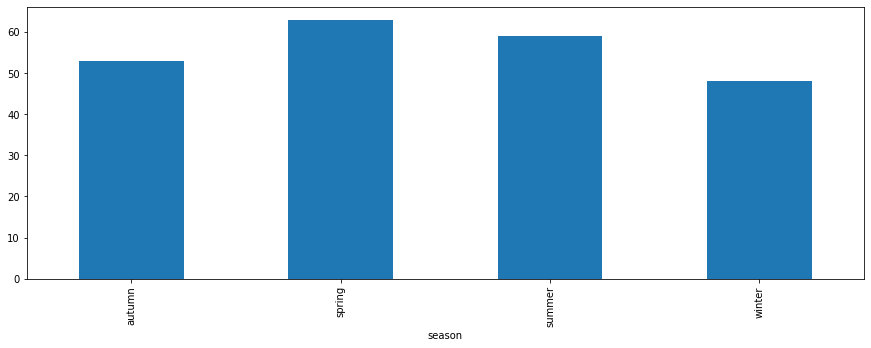

In [38]:
# plotting incidents by season
plt.figure(figsize=(15,5))
subject_incidents.season.groupby(subject_incidents['season']).count().plot(kind="bar")
plt.show()

In [39]:
# creating a new column year
subject_incidents['year'] = pd.to_datetime(subject_incidents['date']).dt.year

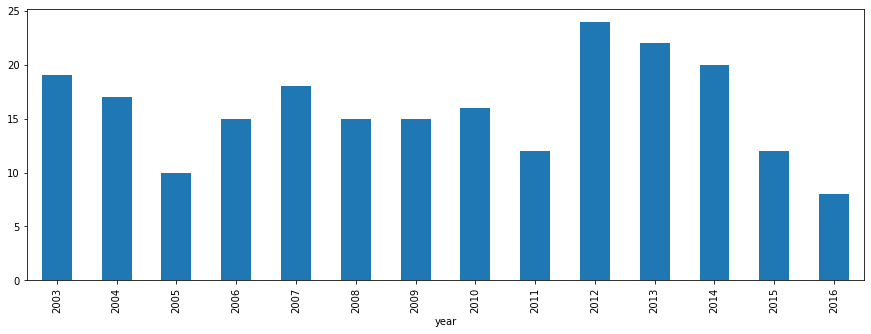

In [40]:
# plotting incidents by year
plt.figure(figsize=(15,5))
subject_incidents.year.groupby(subject_incidents['year']).count().plot(kind="bar")
plt.show()

In [41]:
subject_incidents.subject_weapon.value_counts()

Handgun              98
Vehicle              37
Unarmed              33
Shotgun              10
Knife                10
Hands                10
Assault Rifle         4
Rifle                 4
BB Rifle              3
Pellet Gun            2
Taser                 2
OC Spray              1
Paint Ball Rifle      1
Toy Handun            1
Toy Handgun           1
Box Cutter            1
Screwdriver           1
Toy Rifle             1
BB Gun                1
Rock                  1
Simulated Handgun     1
Name: subject_weapon, dtype: int64

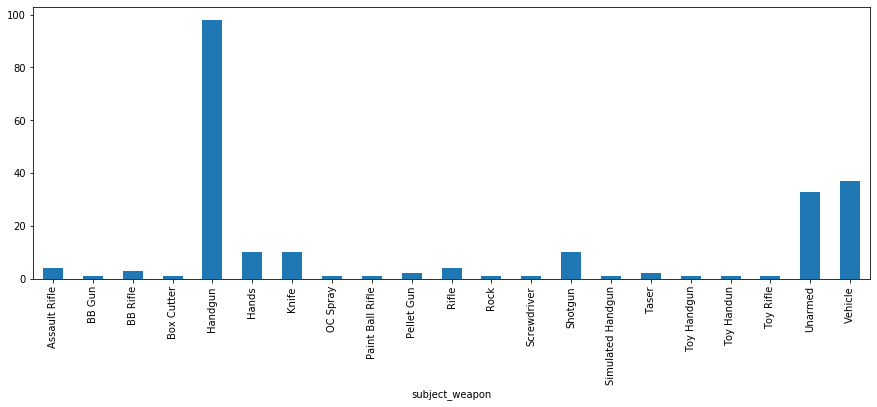

In [42]:
plt.figure(figsize=(15,5))
subject_incidents.race.groupby(subject_incidents['subject_weapon']).count().plot(kind = 'bar')
plt.show()

In [43]:
# 1. Hands are going to be considered as 'unarmed'
# 2. Shotguns and rifles are going to be one category
# 3. Toy, simulated gun and air guns (bb, pellet and paint ball rifle) going to be one category
# 4. One category 'other'

subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Hands', 'Unarmed', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Shotgun', 'Shotgun/Rifle', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Assault Rifle', 'Shotgun/Rifle', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Rifle', 'Shotgun/Rifle', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Pellet Gun', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Paint Ball Rifle', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Toy Handgun', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'BB Gun', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Simulated Handgun', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Toy Handun', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'BB Rifle', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Toy Rifle', 'Toy/Air gun', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Taser', 'other', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Box Cutter', 'other', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Screwdriver', 'other', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'Rock', 'other', subject_incidents.subject_weapon)
subject_incidents.subject_weapon = np.where(subject_incidents.subject_weapon == 'OC Spray', 'other', subject_incidents.subject_weapon)

In [44]:
subject_incidents.subject_weapon.value_counts()

Handgun          98
Unarmed          43
Vehicle          37
Shotgun/Rifle    18
Toy/Air gun      11
Knife            10
other             6
Name: subject_weapon, dtype: int64

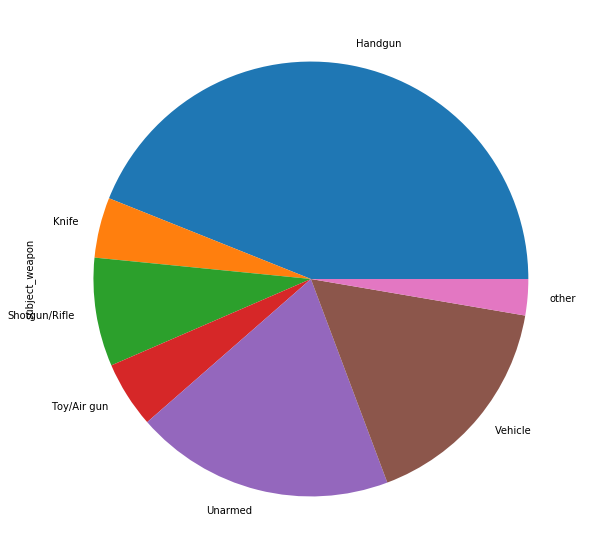

In [45]:
plt.figure(figsize=(10,10))
subject_incidents.subject_weapon.groupby(subject_incidents['subject_weapon']).count().plot(kind = 'pie')
plt.show()

In [46]:
# subject race
subject_incidents.race.value_counts()

B    111
L     72
W     38
A      2
Name: race, dtype: int64

In [47]:
# B: Black, L: Latin, W: White, A: Asian
subject_incidents.race = np.where(subject_incidents['race'] == 'B', 'Black', subject_incidents.race)
subject_incidents.race = np.where(subject_incidents['race'] == 'L', 'Latin', subject_incidents.race)
subject_incidents.race = np.where(subject_incidents['race'] == 'W', 'White', subject_incidents.race)
subject_incidents.race = np.where(subject_incidents['race'] == 'A', 'Asian', subject_incidents.race)

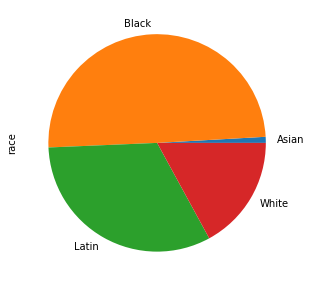

In [48]:
# plot subject race
plt.figure(figsize=(5,5))
subject_incidents.race.groupby(subject_incidents['race']).count().plot(kind = 'pie')
plt.show()

In [49]:
# subject gender
subject_incidents.gender.value_counts()

M    215
F      8
Name: gender, dtype: int64

In [50]:
# What kind of weapons did female subjects used?
pd.crosstab(subject_incidents.gender, subject_incidents.subject_weapon)

subject_weapon,Handgun,Knife,Shotgun/Rifle,Toy/Air gun,Unarmed,Vehicle,other
gender,,,,,,,
F,1,1,0,1,0,4,1
M,97,9,18,10,43,33,5


In [51]:
# Did also female subjects deceased?
pd.crosstab(subject_incidents.gender, subject_incidents.subject_statuses)

subject_statuses,1 Deceased 1 Injured,Deceased,Injured,Other,Shoot and Miss
gender,,,,,
F,0,2,1,0,5
M,2,69,60,2,82


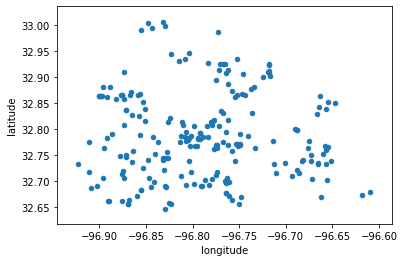

In [52]:
subject_incidents.plot.scatter(x='longitude', y='latitude')

In [53]:
data = subject_incidents[['race', 'subject_statuses', 'latitude', 'longitude']].dropna()

In [54]:
data.isna().any()

race                False
subject_statuses    False
latitude            False
longitude           False
dtype: bool

In [55]:
len(data)

214

In [56]:
mapping = {'Black': 'blue', 'Latin': 'green', 'White': 'yellow', 'Asian': 'red'}
data['race'] = data['race'].apply(lambda x: mapping[x])

In [57]:
data.head()

,race,subject_statuses,latitude,longitude
9,green,Deceased,32.68642,-96.908674
10,blue,Deceased,32.86400,-96.898998
11,yellow,Shoot and Miss,32.81482,-96.826787
12,blue,Injured,32.77540,-96.767489
13,blue,Shoot and Miss,32.74417,-96.828470


In [58]:
mapping = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}
data['subject_statuses'] = data['subject_statuses'].apply(lambda x: mapping.get(x, 100))

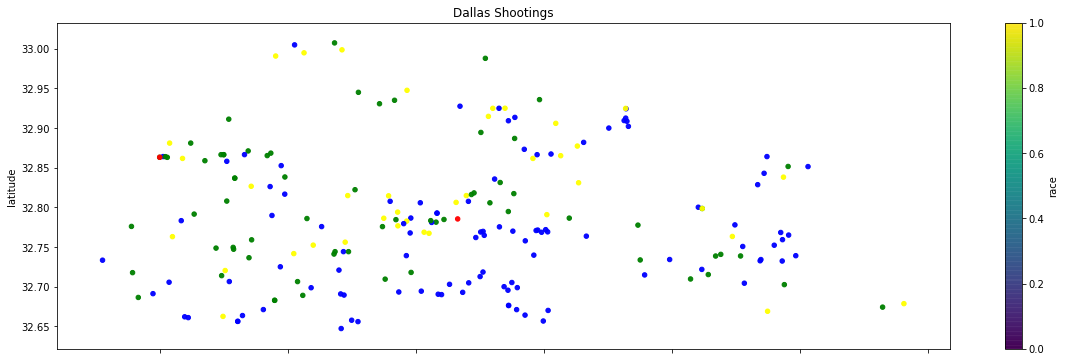

In [59]:
data.plot.scatter(figsize=(20,6), x='longitude', y='latitude', c='race', alpha=.95, title='Dallas Shootings')

In [61]:
m = folium.Map(location=[32.8,-96.8]) 
m
for _, row in data.iterrows():

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['subject_statuses']//100,
        color=row['race'],
        fill=True,
        fill_color=row['race'],
    ).add_to(m)
m